In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas

In [140]:
df = pd.read_csv('D:\Intern\Machine_Learning_Projects\Hotel_Booking_Prediction/hotel_bookings.csv')

In [141]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [142]:
df.shape

(119390, 32)

In [143]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [144]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [145]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [146]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [147]:
list=['adults', 'children', 'babies']
for i in list:
    print('{} has uniques values as {}'.format(i,df[i].unique()))

adults has uniques values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has uniques values as [ 0.  1.  2. 10.  3.]
babies has uniques values as [ 0  1  2 10  9]


In [148]:
pd.set_option('display.max_columns',32)

In [149]:
filter = (df['children']==0)&(df['adults']==0)&(df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [150]:
data = df[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [151]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [152]:
country_wise_data.columns = ['Country','No of guests']
print(country_wise_data)

    Country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]


In [153]:
!pip install folium

In [154]:
import folium
from folium.plugins import HeatMap

In [155]:
folium.Map()

In [156]:
!pip install plotly

In [157]:
import plotly.express as px

In [158]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['Country'],
             color=country_wise_data['No of guests'],
             hover_name=country_wise_data['Country'],
             title='Home country of Guests')
map_guest.show()

In [159]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [160]:
data2=data[data['is_canceled']==0]

In [161]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

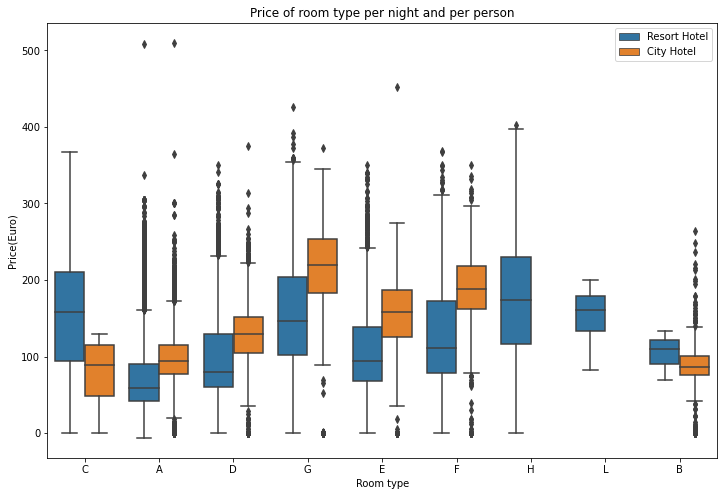

In [162]:
plt.figure(figsize=(12,8))
sas.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)
plt.title('Price of room type per night and per person')
plt.xlabel('Room type')
plt.ylabel('Price(Euro)')
plt.legend()
plt.show()

In [163]:
data_resort=data[(data['hotel']=='Resort Hotel')&(data['is_canceled']==0)]
data_city=data[(data['hotel']=='Resort Hotel')&(data['is_canceled']==0)]

In [164]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [165]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [166]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [167]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['Month','Price_for_resort_hotel','Price_for_city_hotel']
final

,Month,Price_for_resort_hotel,Price_for_city_hotel
0,April,75.867816,75.867816
1,August,181.205892,181.205892
2,December,68.410104,68.410104
3,February,54.147478,54.147478
4,January,48.761125,48.761125
5,July,150.122528,150.122528
6,June,107.974850,107.974850
7,March,57.056838,57.056838
8,May,76.657558,76.657558
9,November,48.706289,48.706289


In [168]:
!pip install sorted-months-weekdays    #Installing packages  

ERROR: Invalid requirement: '#Installing'


In [169]:
!pip install sort-dataframeby-monthorweek #Installing packages

ERROR: Invalid requirement: '#Installing'


In [170]:
import sort_dataframeby_monthorweek as sd #importing package and giving an alias

In [171]:
def sort_data(df,colname):                          #function taking inputs - dataframe and column name
    return sd.Sort_Dataframeby_Month(df,colname)    #returning sorted order of month

In [172]:
final=sort_data(final,'Month') #Calling the function and giving parameters
final                  #printing the table

,Month,Price_for_resort_hotel,Price_for_city_hotel
0,January,48.761125,48.761125
1,February,54.147478,54.147478
2,March,57.056838,57.056838
3,April,75.867816,75.867816
4,May,76.657558,76.657558
5,June,107.974850,107.974850
6,July,150.122528,150.122528
7,August,181.205892,181.205892
8,September,96.416860,96.416860
9,October,61.775449,61.775449


In [173]:
final.columns                   #Checking column names

Index(['Month', 'Price_for_resort_hotel', 'Price_for_city_hotel'], dtype='object')

In [174]:
px.line(final,x='Month',y=['Price_for_resort_hotel', 'Price_for_city_hotel'],title='Room price per night over the months')           #plotting table using line

# Analysing Demand of Hotels

In [175]:
data_resort.head()         #watching dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [176]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()     #accessing feature and converting into data frame
rush_resort.columns=['Month','No of guests']              #renaming column name
rush_resort                                       #printing the data frame

,Month,No of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [177]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()     #accessing feature and converting into data frame
rush_city.columns=['Month','No of guests']              #renaming column name
rush_city                                       #printing the data frame

,Month,No of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [178]:
final_rush=rush_resort.merge(rush_city,on='Month')     #Merging rush resort with rush city

In [179]:
final_rush.columns=['Month','No of guests in resort','No of guests of city hotel']   #Renaming new column name

In [180]:
final_rush=sort_data(final_rush,'Month')       #Sorting month column in hierarchical manner
final_rush

,Month,No of guests in resort,No of guests of city hotel
0,January,1866,1866
1,February,2308,2308
2,March,2571,2571
3,April,2550,2550
4,May,2535,2535
5,June,2037,2037
6,July,3137,3137
7,August,3257,3257
8,September,2102,2102
9,October,2575,2575


In [181]:
final_rush.columns   #Retrieving column name

Index(['Month', 'No of guests in resort', 'No of guests of city hotel'], dtype='object')

In [182]:
px.line(final_rush,x='Month',y=['No of guests in resort', 'No of guests of city hotel'],title='Total number of guests per month')

In [183]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [184]:
data.corr()             #finding correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [185]:
co_relation=data.corr()['is_canceled']       #findint correlation with respect to is_canceled
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [186]:
co_relation.abs().sort_values(ascending=False)        #used abs to avoid negative values and sort_values to sort the value of correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [187]:
data.groupby('is_canceled')['reservation_status'].value_counts()   #Checking reservation_status on the basis of is_canceled

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [188]:
list_not=['days_in_waiting_list','arrival_date_year']     #excluding this feature

In [189]:
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]     #fetching numerical colums 
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [190]:
data.columns             #showing all columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [191]:
cat_not=['arrival_date_year','assigned_room_type','booking_changes','reservation_status','country','days_in_waiting_list']                #excluding categorical columns

In [192]:
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]        #list comprehension
cat_features                                                                              

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [193]:
data_cat=data[cat_features]        #pushing cat_features to datafrmae

In [194]:
data_cat      #executing 

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,9/6/2017
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,9/7/2017
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,9/7/2017
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,9/7/2017


In [195]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [196]:
import warnings
from warnings import filterwarnings      #importing filterwarnings from warnings package
filterwarnings('ignore')                 #ingnoring warnings

In [197]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])   #converting into datetime format and updating data_cat feature

In [198]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)            #dropping reservation_status_date and updating by inplace true

In [199]:
data_cat['cancellation']=data['is_canceled']               #inserting column

In [200]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,0


In [201]:
data_cat['market_segment'].unique()      #showing unique directory of market_segment

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [202]:
cols = data_cat.columns                             #showing colums from 0 to 8 as we don't need cancellation column
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'cancellation'],
      dtype='object')

In [203]:
data_cat.groupby(['hotel'])['cancellation'].mean()       #accessing hotels

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

In [204]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())        #performing mean coding for each and every feature
    print('\n')                                                  #added new line to make it more user friendly

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64


reserve

In [205]:
for col in cols:
    dict=data_cat.groupby([col])['cancellation'].mean().to_dict()        #converted into dictionary
    data_cat[col]=data_cat[col].map(dict)                                #mapping the dictionary and updating data column

In [206]:
data_cat.head()          #for showing few rows

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.0


In [207]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)     #concatenating in vertical fashion that's why axis=1

In [208]:
dataframe.head()      #dataframe showing

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [209]:
dataframe.drop('cancellation',axis=1,inplace=True)             #dropping cancellation and updating dataframe by inplace true

In [210]:
dataframe.shape                                                #For showing shape of dataframe

(119210, 26)

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

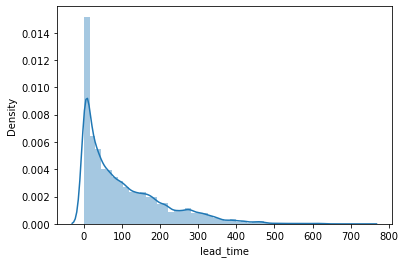

In [211]:
sas.distplot(dataframe['lead_time'])       #Making distribution plot of lead_time by accessing dataframe

In [212]:
import numpy as np      
def handle_outlier(col):            #taking log of lead_time time for greater extent of skewness 
    dataframe[col]=np.log1p(dataframe[col])

In [213]:
handle_outlier('lead_time')     #calling the function

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

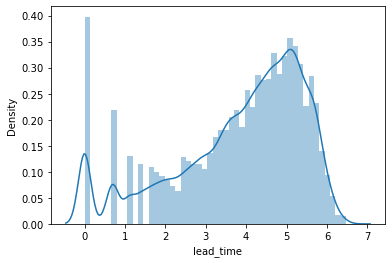

In [214]:
sas.distplot(dataframe['lead_time'])              #showing distribution plot log applied lead_time

<AxesSubplot:xlabel='adr', ylabel='Density'>

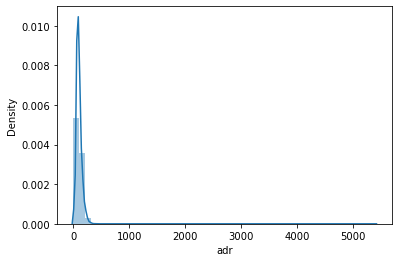

In [215]:
sas.distplot(dataframe['adr'])                      #distribution plot of adr

In [216]:
handle_outlier('adr')                                         #handling outlier for adr

<AxesSubplot:xlabel='adr', ylabel='Density'>

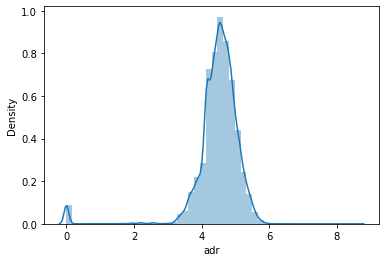

In [217]:
sas.distplot(dataframe['adr'].dropna())                       #distribution plot of adr and handling missing values by dropna  

In [218]:
dataframe.isnull().sum()            #checking null values and doing their sum

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [219]:
dataframe.dropna(inplace=True)          #dropping null values and updating dataframe

In [220]:
y=dataframe['is_canceled']              #predicting independent features -> is_canceled
x=dataframe.drop('is_canceled',axis=1)     #dropping is_canceled feature

In [221]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel        #for selecting important features

In [222]:
feature_sel_model=SelectFromModel(Lasso(alpha=.005,random_state=0))                   #Specifying lasso regression model & setting low alpha value and putting random_state=0

In [223]:
feature_sel_model.fit(x,y)                        #fitting data to object

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [224]:
feature_sel_model.get_support()         #getting all the values from list

array([False, False, False, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [225]:
cols=x.columns          #all the columns

In [226]:
selected_feat=cols[feature_sel_model.get_support()]                     #adding filters to column

In [227]:
print('total_features {}'.format(x.shape[1]))                   #printing total features
print('selected_features {}'.format(len(selected_feat)))        #printing the selected features

total_features 25
selected_features 15


In [228]:
selected_feat                                            #printing the entire features

Index(['deposit_type', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [229]:
x=x[selected_feat]                     #updating independent dataframe

In [230]:
x

,deposit_type,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.28402,5.837730,27,1,0,2,0.0,0,0,3,0.0,0.0,0.000000,0,0
1,0.28402,6.603944,27,1,0,2,0.0,0,0,4,0.0,0.0,0.000000,0,0
2,0.28402,2.079442,27,1,1,1,0.0,0,0,0,0.0,0.0,4.330733,0,0
3,0.28402,2.639057,27,1,1,1,0.0,0,0,0,304.0,0.0,4.330733,0,0
4,0.28402,2.708050,27,1,2,2,0.0,0,0,0,240.0,0.0,4.595120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.28402,3.178054,35,30,5,2,0.0,0,0,0,394.0,0.0,4.576153,0,0
119386,0.28402,4.634729,35,31,5,3,0.0,0,0,0,9.0,0.0,5.422436,0,2
119387,0.28402,3.555348,35,31,5,2,0.0,0,0,0,9.0,0.0,5.067079,0,4
119388,0.28402,4.700480,35,31,5,2,0.0,0,0,0,89.0,0.0,4.657763,0,0


In [231]:
from sklearn.model_selection import train_test_split         #for splitting data into train and test set

In [232]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)           #taking 25% of data for testing

In [233]:
from sklearn.linear_model import LogisticRegression             #importing logisticregression

In [234]:
logreg=LogisticRegression()                                     #calling the logisticregression class

In [235]:
logreg.fit(X_train,y_train)                                     #fitting training data

LogisticRegression()

In [236]:
y_pred=logreg.predict(X_test)                                   #doing prediction on test data

In [237]:
y_pred                                                          #printing the prediction array

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [238]:
from sklearn.metrics import confusion_matrix                    #importing confusion matrix

In [239]:
confusion_matrix(y_test,y_pred)                                 #confusion matrix of this logistic regression model

array([[15561,  3078],
       [ 4513,  6651]], dtype=int64)

In [240]:
from sklearn.metrics import accuracy_score                  #importing accuracy_score to check accuracy

In [241]:
accuracy_score(y_test,y_pred)                               #checking accuracy_score of y test and prediction

0.7452940979096064

In [242]:
from sklearn.model_selection import cross_val_score           #importing cross validation

In [243]:
score=cross_val_score(logreg,x,y,cv=10)                          #applying cross validation for achieving more accurate score

In [244]:
score.mean()                                                    #achieved new score by calling mean

0.7219678417028434

In [245]:
from sklearn.naive_bayes import GaussianNB                  #importing gussain from navie_bayes algo

In [246]:
from sklearn.linear_model import LogisticRegression         #importing logisticregression from linear_model 

In [247]:
from sklearn.neighbors import KNeighborsClassifier          #importing knn algorithm

In [248]:
from sklearn.ensemble import RandomForestClassifier         #importing random forest from ensemble

In [249]:
from sklearn.tree import DecisionTreeClassifier             #importing decision tree classifier

In [262]:
models=[]                                                      #this blank list is for appending all algorithms

models.append(('LogisticRegression',LogisticRegression()))     #appending logisticregression and initializing it
models.append(('Navie Bayes',GaussianNB()))                      #appending Naive Bayes and initializing it
models.append(('RandomForest',RandomForestClassifier()))         #appending random forest and initializing it
models.append(('Decision Tree',DecisionTreeClassifier()))      #appending decision tree and initializing it
models.append(('KNN',KNeighborsClassifier()))                  #appending knn and initializing it

In [264]:
for name,model in models:                                      #iterating over models
    print(name)                                                #printing name of model
    model.fit(X_train,y_train)                             #fitting train set of x & y into model
    predictions=model.predict(X_test)                    #predicting test set of x
    
    from sklearn.metrics import confusion_matrix                    #importing confusion matrix
    print(confusion_matrix(predictions,y_test))                  #printing confusion matrix
    print('\n')
    print(accuracy_score(predictions,y_test))                   #printing accuracy_score
    print('\n')

LogisticRegression
[[15561  4513]
 [ 3078  6651]]


0.7452940979096064


Navie Bayes
[[ 7838  1053]
 [10801 10111]]


0.6022548065630977


RandomForest
[[17435  2862]
 [ 1204  8302]]


0.8635707814649531


Decision Tree
[[15979  2657]
 [ 2660  8507]]


0.8215951414287153


KNN
[[16256  3273]
 [ 2383  7891]]


0.8102204476059457


